In [1]:
import os
import cv2
from matplotlib import pyplot as plt
from matplotlib.image import imread
from skimage.feature import hog
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma
from skimage.exposure import rescale_intensity

In [28]:
def plot(image, pixels_per_cell, weight):
    if weight != 0:
        image = denoise_tv_chambolle(image, weight=weight, multichannel=True)
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=pixels_per_cell,
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    image = cv2.resize(image, (200, 200))
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale & resize histogram for better display
    hog_image_rescaled = rescale_intensity(hog_image, in_range=(0, 8))
    hog_image_rescaled = cv2.resize(hog_image_rescaled, (200, 200))
    
    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

We first take a raw low resolution image. It usually contains noise.

In [29]:
img_path = os.path.join(os.getcwd(), "Images/2.jpg")
image = imread(img_path)

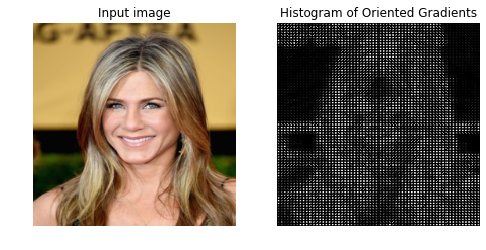

In [30]:
plot(image, (4, 4), 0)

We de-noise it and obtain the hog again

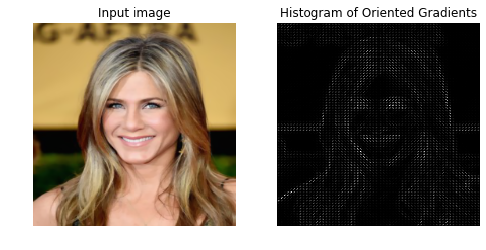

In [31]:
plot(image, (4, 4), 0.01)

We take a higher resolution image. Takes significantly longer and also slightly inaccurate for the same pixels per cell.

In [32]:
img_path = os.path.join(os.getcwd(), "Images/3.jpg")
image = imread(img_path)

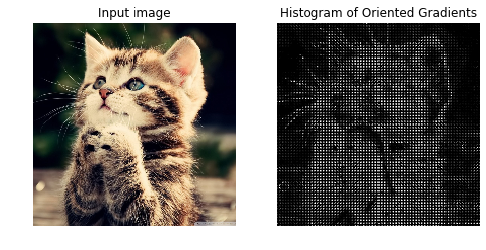

In [33]:
img = plot(image, (4, 4), 0.0)

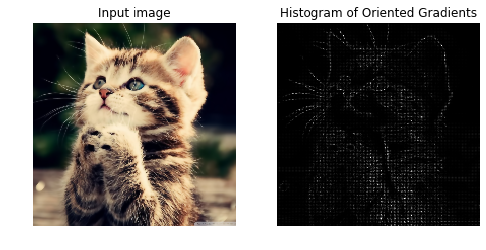

In [34]:
img = plot(image, (2, 2), 0.1)